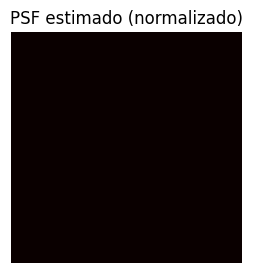

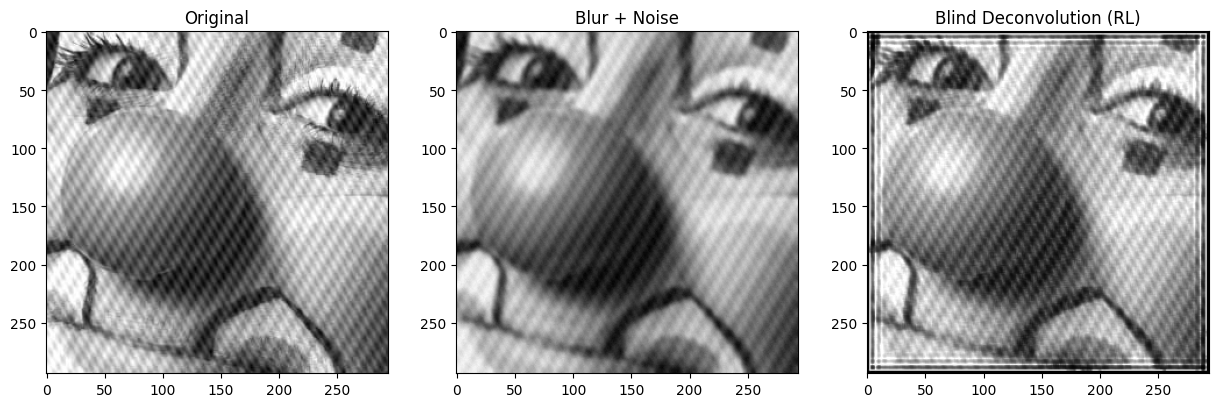

=== Mean Squared Error (MSE) ===
  MSE:  0.021718


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import restoration, color, img_as_float

# Leer imagen y convertir a float en escala de grises
image = cv2.imread('clown.jpg', cv2.IMREAD_GRAYSCALE)
image = img_as_float(image)

psf = np.ones((5, 5)) / 25  # punto de desenfoque simulado
blurred = cv2.filter2D(image, -1, psf)
blurred += 0.01 * np.random.standard_normal(blurred.shape)  # agrega ruido

# Blind deconvolution usando el algoritmo Richardson-Lucy iterativo
# skimage no tiene un "blind" real, pero podemos estimar el PSF iterativamente.

# Estimación inicial del kernel (PSF)
psf_est = np.ones((5, 5)) / 25

psf_display = psf_est / psf_est.max()  # normaliza entre 0 y 1
plt.figure(figsize=(3,3))
plt.imshow(psf_est, cmap='hot')
plt.title('PSF estimado (normalizado)')
plt.axis('off')
plt.show()

# Aplicar deconvolución iterativa
deconvolved = restoration.richardson_lucy(blurred, psf_est, num_iter=30)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(blurred, cmap='gray')
plt.title('Blur + Noise')

plt.subplot(1,3,3)
plt.imshow(deconvolved, cmap='gray')
plt.title('Blind Deconvolution (RL)')

plt.show()

def mse(original, restored):
    return np.mean((original - restored) ** 2)

mseimg = mse(blurred,deconvolved)
print("=== Mean Squared Error (MSE) ===")
print(f"  MSE:  {mseimg:.6f}")


El código lee una imagen en escala de grises, le aplica un desenfoque mediante un filtro promedio (blur) y un poco de ruido para simular una degradación, y luego intenta restaurarla usando el algoritmo de deconvolución de Richardson–Lucy, que busca invertir el efecto del desenfoque estimando la imagen original a partir de la borrosa y un modelo aproximado del filtro usado. Finalmente, muestra la imagen original, la borrosa y la restaurada para comparar los resultados.